## Import Libraries and Datasets 

In [1]:
# Import data and libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path to folder
path = r'C:\Users\Kripamahesh\Documents\Achievement 6 Task 6.1'

In [3]:
# Import cleaned dataset
df_clean=pd.read_csv(os.path.join(path, '02.DATA', 'chocolate_bar_rates.csv'))

### Step 2: Questions defined

### Create a correlation matrix heatmap

In [4]:
df_clean.head(5)

,Unnamed: 0,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [5]:
# Correlations
df_clean.corr()

C:\Users\Kripamahesh\AppData\Local\Temp\ipykernel_28452\3161127639.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,Unnamed: 0,id,year_reviewed,cocoa_percent,num_ingredients,rating
Unnamed: 0,1.000000,0.012381,0.010550,0.030168,0.062557,-0.009762
id,0.012381,1.000000,0.993126,0.015835,-0.356845,0.113398
year_reviewed,0.010550,0.993126,1.000000,0.016484,-0.362956,0.116256
cocoa_percent,0.030168,0.015835,0.016484,1.000000,-0.187468,-0.146690
num_ingredients,0.062557,-0.356845,-0.362956,-0.187468,1.000000,-0.098834
rating,-0.009762,0.113398,0.116256,-0.146690,-0.098834,1.000000


####  Questions from previous ex.
##### Does cocoa percentage or ingredients affect the rating?( cocoa_percent and ingredient)
##### How much is the ingredients effect the ratings( ingredients and rating)
##### Which countries of bean origin results in the highest rating?( bean orgin and rating)
##### Is the company located and the bean orgin in the same country( company location and bean orgin)
##### With these high rates, what are the most memorable characteristics 

### Make list of column names grouped to make subset_df.


In [6]:
# make list of col grouped
cocoa_ing=['cocoa_percent','num_ingredients']

In [7]:
ing_rat=['num_ingredients','rating']

In [8]:
bean_rat=['bean_origin','rating']

In [9]:
comp_bean=['company_location','bean_origin']

In [10]:
rat_id=['rating','id']

In [11]:
# make subsets with the col grouped
df_cocoa_ing=df_clean[cocoa_ing]

In [12]:

df_ing_rat=df_clean[ing_rat]

In [13]:
df_bean_rat=df_clean[bean_rat]

In [14]:
df_comp_bean=df_clean[comp_bean]

In [15]:
df_rat_id=[rat_id]

### Step 3: Create a correlation heatmap

C:\Users\Kripamahesh\AppData\Local\Temp\ipykernel_28452\3218442101.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_clean.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

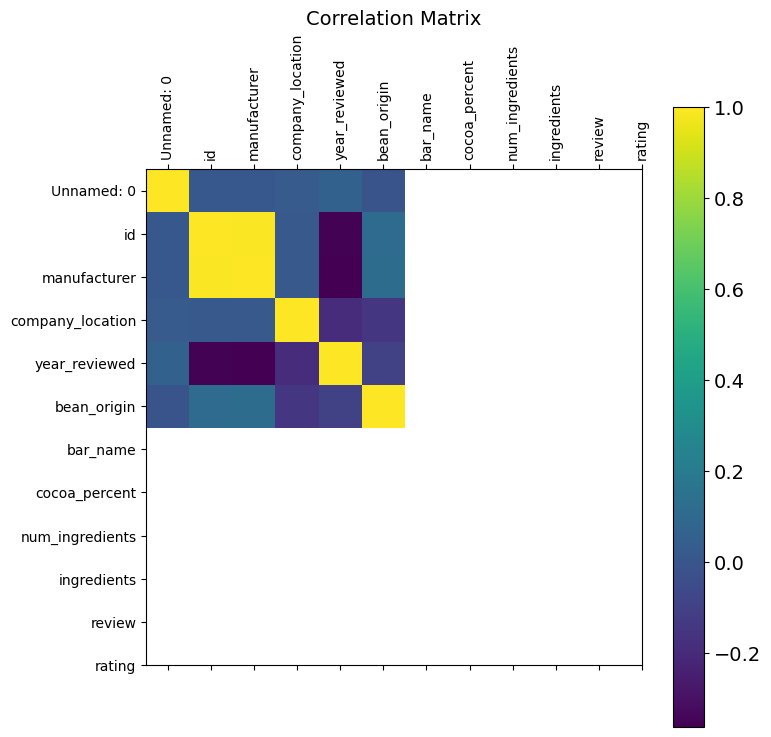

In [16]:
f = plt.figure(figsize=(8,8)) # figure size
plt.matshow(df_clean.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_clean.shape[1]), df_clean.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(df_clean.shape[1]), df_clean.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

                

####  Observation:The correlation between the variables are not clear much

### create a correlation using seaborn

C:\Users\Kripamahesh\AppData\Local\Temp\ipykernel_28452\4092215382.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=sns.heatmap(df_clean.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficient onto to the heatmap


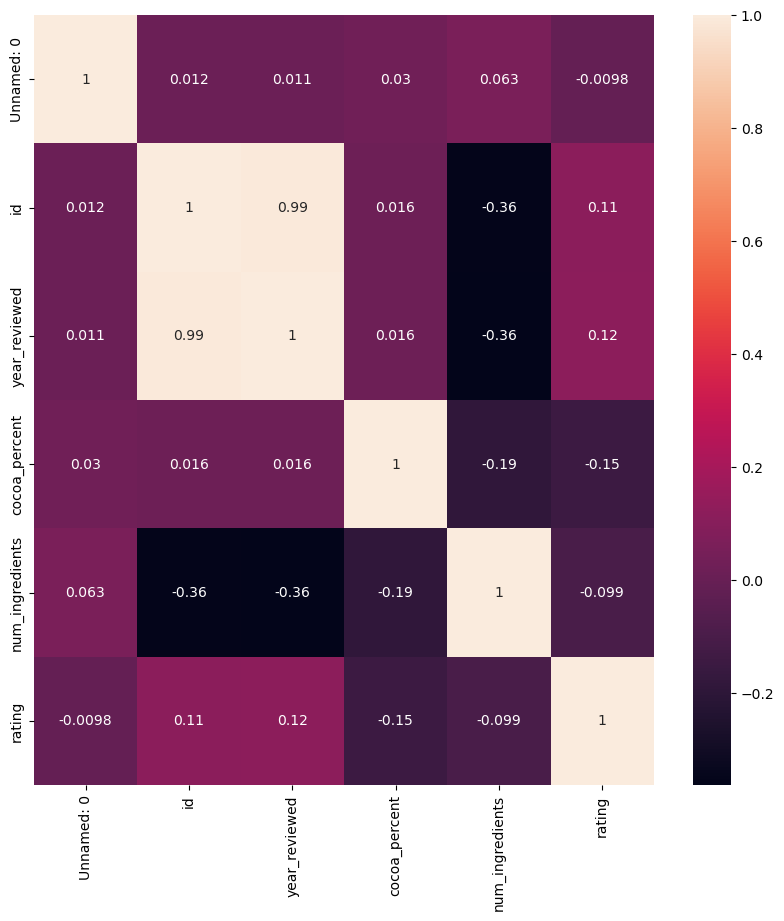

In [17]:
# create a subplot
f,ax=plt.subplots(figsize=(10,10))
# create correlation heatmap in seaborn
corr=sns.heatmap(df_clean.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficient onto to the heatmap

#### Observation: Relationships are clearly shown here. Light color shows positive relationship. pink colour shows poor relationshop and black/dark colou shows no or negative relationships

### Step 4: Scatterplot

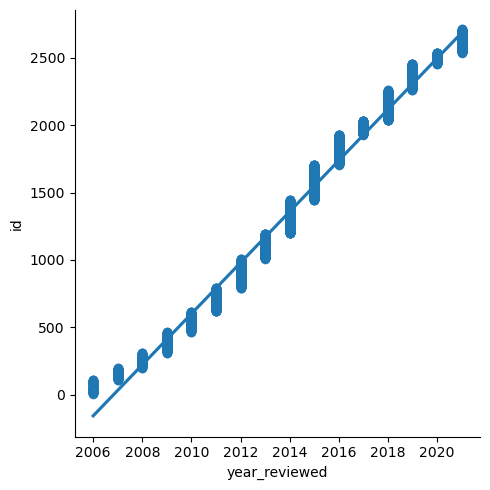

In [18]:
# Create scatterplt with strongest relationships(year_reviewed and id)
scatter_year_id = sns.lmplot(x= 'year_reviewed', y= 'id', data= df_clean)

<Axes: xlabel='year_reviewed', ylabel='id'>

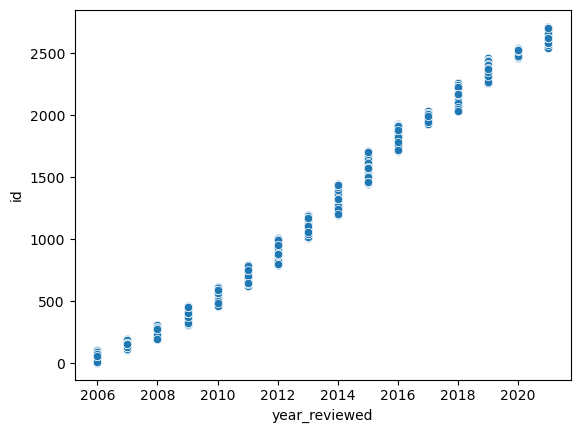

In [19]:
sns.scatterplot(x= 'year_reviewed', y= 'id', data= df_clean)


#### Observation:  graph shows an upward trend, the item id is more as the year moves presenting more no of chocolate bars 

### Step 5: pairplot of entire dataset

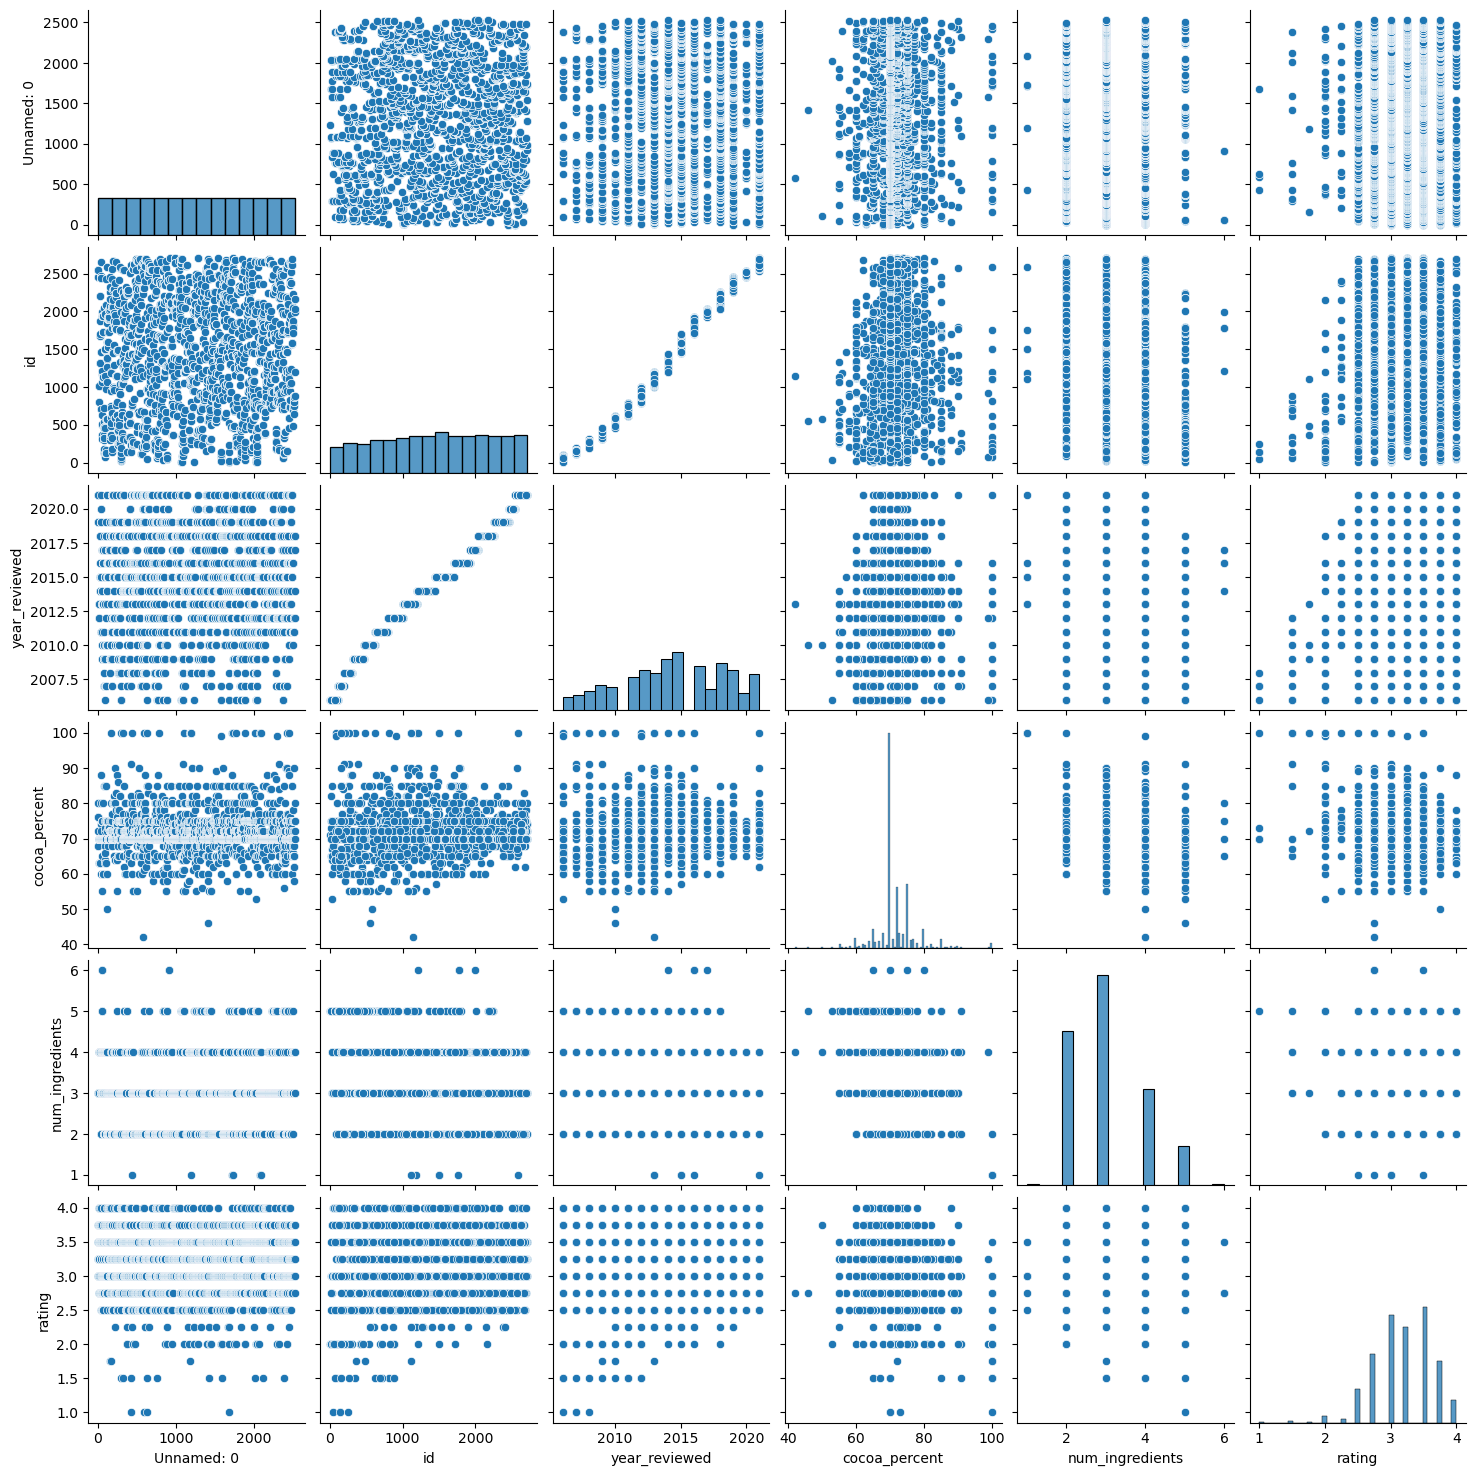

In [20]:
# create pairplot 
g = sns.pairplot(df_clean)

#### Observation: year_reviewed and id is the one that shows strong relation, here would like to know the variables cocoa percent with id and ingredients.

### Step 6: Categorical plot

<Axes: xlabel='cocoa_percent', ylabel='Count'>

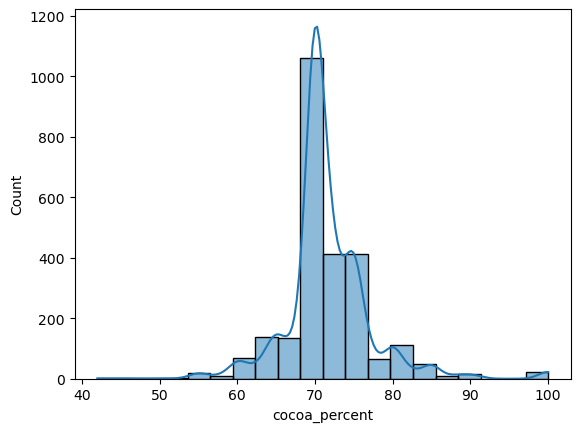

In [21]:
# create a categorical variable for total cocoa_percent, now create histogram
sns.histplot(df_clean['cocoa_percent'], bins = 20, kde = True)

In [21]:
df_cocoa_ing.dtypes

cocoa_percent      float64
num_ingredients    float64
dtype: object

In [22]:
df_clean.dtypes

Unnamed: 0            int64
id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients     float64
ingredients          object
review               object
rating              float64
dtype: object

In [23]:

df_cocoa_rat=df_clean[['cocoa_percent','rating']]

In [24]:
df_cocoa_rat.head(2)

,cocoa_percent,rating
0,76.0,3.25
1,76.0,3.50


In [25]:
df_cocoa_rat.dtypes

cocoa_percent    float64
rating           float64
dtype: object

In [26]:
# creating categories according to the rating 
df_cocoa_rat.loc[df_cocoa_rat['rating']<2, 'Cocoa_rating'] = 'Low'

C:\Users\Kripamahesh\AppData\Local\Temp\ipykernel_28452\320588959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cocoa_rat.loc[df_cocoa_rat['rating']<2, 'Cocoa_rating'] = 'Low'


In [27]:
df_cocoa_rat.loc[(df_cocoa_rat['rating']>=2) & (df_cocoa_rat['rating']<3), 'Cocoa_rating'] = 'Medium'

In [28]:
df_cocoa_rat.loc[df_cocoa_rat['rating']>=3, 'Cocoa_rating'] = 'High'

In [29]:
df_cocoa_rat.head(5)

,cocoa_percent,rating,Cocoa_rating
0,76.0,3.25,High
1,76.0,3.50,High
2,76.0,3.75,High
3,68.0,3.00,High
4,72.0,3.00,High


In [30]:
df_cocoa_rat['rating'].value_counts(dropna=False)

3.50    565
3.00    523
3.25    464
2.75    333
3.75    300
2.50    166
4.00    112
2.00     33
2.25     17
1.50     10
1.00      4
1.75      3
Name: rating, dtype: int64

In [32]:
df_cocoa_rat['Cocoa_rating'].value_counts(dropna=False)

High      1964
Medium     549
Low         17
Name: Cocoa_rating, dtype: int64

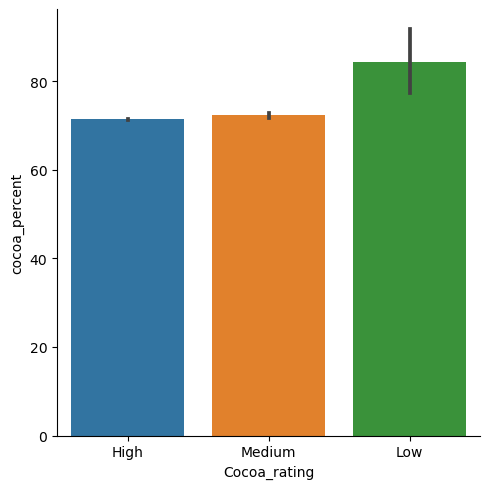

In [34]:
# Create a categorical plot 
categorical = sns.catplot(x='Cocoa_rating', y='cocoa_percent', data=df_cocoa_rat, kind="bar")

### Saving all the visuals 

In [35]:
# save correlation chart
corr.figure.savefig(os.path.join(path, '04.ANALYSIS & VISUALIZATION','correlation_heatmap.png'), bbox_inches='tight')

In [36]:
# save scatterplot 
scatter_year_id.figure.savefig(os.path.join(path, '04.ANALYSIS & VISUALIZATION','scatte_year_id.png'), bbox_inches='tight')


In [37]:
# save pairplot
g.figure.savefig(os.path.join(path, '04.ANALYSIS & VISUALIZATION','correlation_heatmap.png'), bbox_inches='tight')


In [38]:
# save categoricalplot
categorical.figure.savefig(os.path.join(path, '04.ANALYSIS & VISUALIZATION','correlation_heatmap.png'), bbox_inches='tight')

### Answer to question:  there is no much positive relation between the variables. so the further analysis can be done with the id's od chocolate bars and the year to find how many are produces with the same id per year. 

#### Hypotheses: with the strong relationship only can find the no of id's of the chocolate bar manufactured in each year. 